In [4]:
# from matplotlib import style
# style.use('fivethirtyeight')

# data science
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Import the create_engine function from sqlalchemy
from sqlalchemy import create_engine

# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///hawaii.sqlite")


In [13]:
from sqlalchemy import create_engine, inspect
import os

# Define the path to the SQLite database
db_path = "hawaii.sqlite"

# Check if the file exists
if not os.path.exists(db_path):
    raise FileNotFoundError(f"The database file at {db_path} does not exist.")

# Create engine using the SQLite database file
engine = create_engine(f"sqlite:///{db_path}")

# Create the inspector and connect it to the engine
inspector_gadget = inspect(engine)

# Collect the names of tables within the database
tables = inspector_gadget.get_table_names()

# Print metadata for each table
for table in tables:
    print(table)
    print("-----------")
    
    # Get columns
    columns = inspector_gadget.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()


measurement
-----------
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

station
-----------
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT



In [9]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

# Print all of the classes mapped to the Base

print(list(Base.classes))

[<class 'sqlalchemy.ext.automap.measurement'>, <class 'sqlalchemy.ext.automap.station'>]


In [5]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [14]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
query = "SELECT max(date) from measurement"

with engine.connect() as conn:
    print(conn.execute(text(query)).fetchall())

[('2017-08-23',)]


In [8]:
session.query(Measurement.date).order_by(Measurement.date.desc()).limit(1).all()

[('2017-08-23',)]

In [12]:
query = """
    SELECT
        date,
        station,
        prcp
    FROM
        measurement
    WHERE
        date >= '2016-08-23'
    ORDER BY
        date ASC;
"""

df = pd.read_sql(text(query), con=engine)
df.head()

,date,station,prcp
0,2016-08-23,USC00519397,0.00
1,2016-08-23,USC00513117,0.15
2,2016-08-23,USC00514830,0.05
3,2016-08-23,USC00517948,NaN
4,2016-08-23,USC00519523,0.02


        Date      Station  Precipitation
0 2016-08-23  USC00519397           0.00
1 2016-08-23  USC00513117           0.15
2 2016-08-23  USC00514830           0.05
3 2016-08-23  USC00517948            NaN
4 2016-08-23  USC00519523           0.02


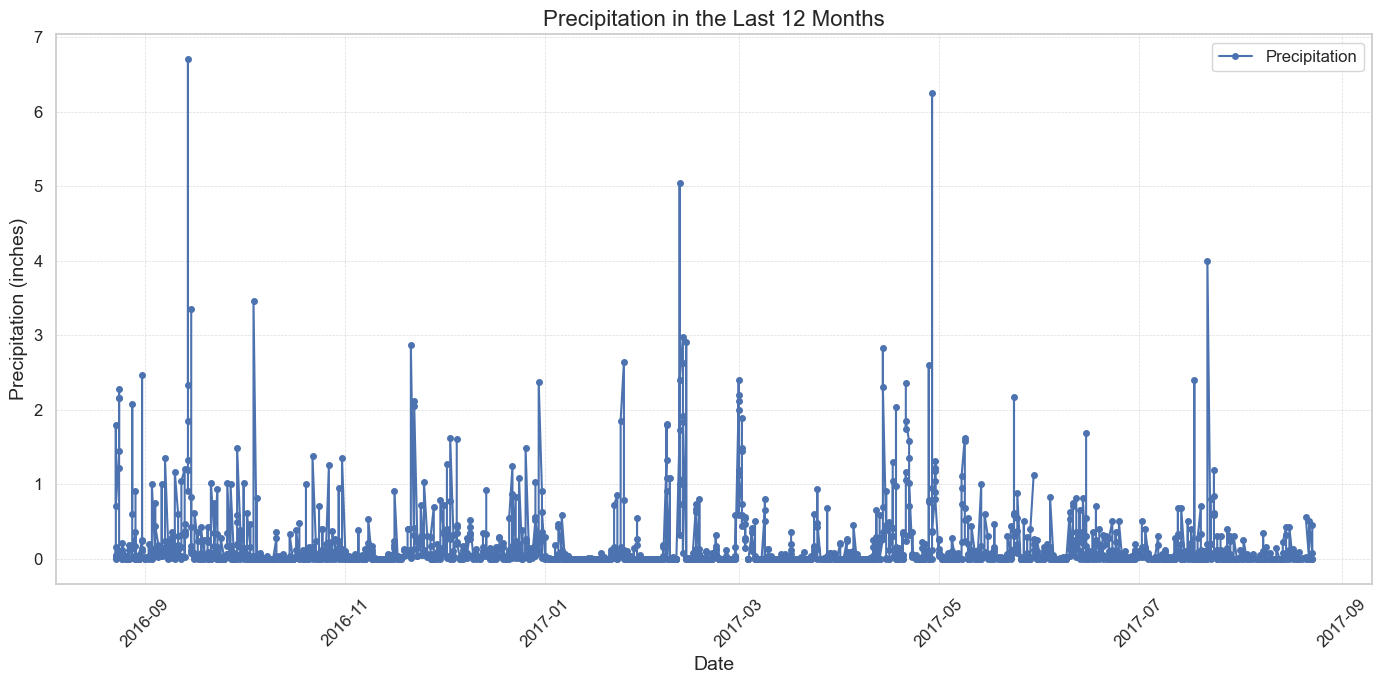

In [19]:
# Create the engine to connect to the SQLite database
engine = create_engine("sqlite:///hawaii.sqlite")

# Declare a Base using automap_base()
Base = automap_base()

# Reflect the database tables and map them to the Base
Base.prepare(autoload_with=engine)

# Assign the measurement class to a variable called Measurement
Measurement = Base.classes.measurement

# Create a session
session = Session(engine)

# Find the most recent date in the dataset
most_recent_date = session.query(func.max(Measurement.date)).first()[0]
most_recent_date = datetime.datetime.strptime(most_recent_date, "%Y-%m-%d").date()

# Calculate the date one year from the last date in the dataset
start_date = most_recent_date - datetime.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.station, Measurement.prcp).\
    filter(Measurement.date >= start_date).\
    order_by(Measurement.date.asc()).\
    all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df2 = pd.DataFrame(results, columns=["Date", "Station", "Precipitation"])

# Sort the dataframe by date
df2["Date"] = pd.to_datetime(df2['Date'])
df2 = df2.sort_values(by="Date", ascending=True).reset_index(drop=True)

# Display the first few rows of the dataframe
print(df2.head())

# Set the Seaborn style
sns.set(style="whitegrid")

# Create a figure and an axis
plt.figure(figsize=(14, 7))

# Plot the data with enhancements
plt.plot(df2["Date"], df2["Precipitation"], label='Precipitation', color='b', linestyle='-', marker='o', markersize=4, linewidth=1.5)

# Add labels, title, and legend
plt.xlabel("Date", fontsize=14)
plt.ylabel("Precipitation (inches)", fontsize=14)
plt.title("Precipitation in the Last 12 Months", fontsize=16)
plt.legend(loc='upper right', fontsize=12)

# Customize the x-ticks
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Use tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

# Close the session
session.close()


        Date      Station  Precipitation
0 2016-08-23  USC00519397           0.00
1 2016-08-23  USC00513117           0.15
2 2016-08-23  USC00514830           0.05
3 2016-08-23  USC00517948            NaN
4 2016-08-23  USC00519523           0.02


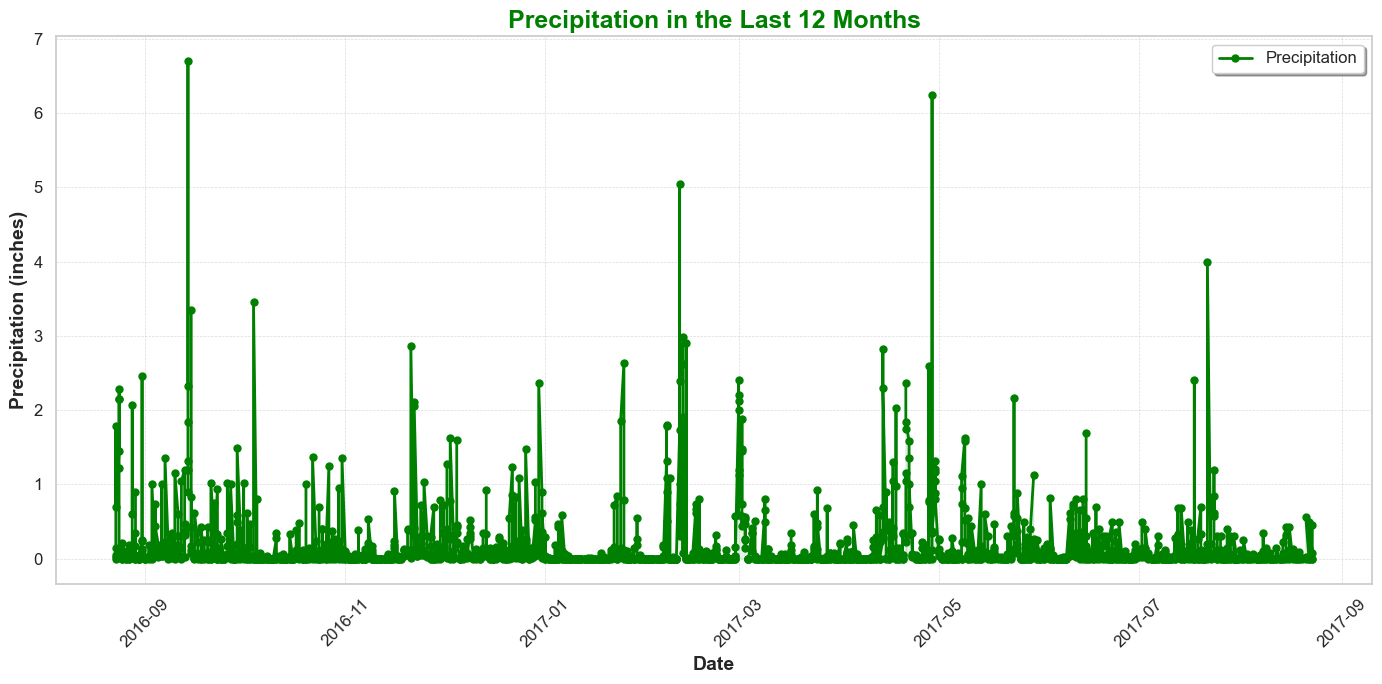

In [21]:
# Create the engine to connect to the SQLite database       (Used Xpert and ChatGPT for assistance)
engine = create_engine("sqlite:///hawaii.sqlite")

# Declare a Base using automap_base()
Base = automap_base()

# Reflect the database tables and map them to the Base
Base.prepare(autoload_with=engine)

# Assign the measurement class to a variable called Measurement
Measurement = Base.classes.measurement

# Create a session
session = Session(engine)

# Find the most recent date in the dataset
most_recent_date = session.query(func.max(Measurement.date)).first()[0]
most_recent_date = datetime.datetime.strptime(most_recent_date, "%Y-%m-%d").date()

# Calculate the date one year from the last date in the dataset
start_date = most_recent_date - datetime.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.station, Measurement.prcp).\
    filter(Measurement.date >= start_date).\
    order_by(Measurement.date.asc()).\
    all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df2 = pd.DataFrame(results, columns=["Date", "Station", "Precipitation"])

# Sort the dataframe by date
df2["Date"] = pd.to_datetime(df2['Date'])
df2 = df2.sort_values(by="Date", ascending=True).reset_index(drop=True)

# Display the first few rows of the dataframe
print(df2.head())

# Set the Seaborn style
sns.set(style="whitegrid")

# Create a figure and an axis
plt.figure(figsize=(14, 7))

# Plot the data with enhancements
plt.plot(df2["Date"], df2["Precipitation"], label='Precipitation', color='green', linestyle='-', marker='o', markersize=5, linewidth=2)

# Add labels, title, and legend
plt.xlabel("Date", fontsize=14, fontweight='bold')
plt.ylabel("Precipitation (inches)", fontsize=14, fontweight='bold')
plt.title("Precipitation in the Last 12 Months", fontsize=18, fontweight='bold', color='green')
plt.legend(loc='upper right', fontsize=12, frameon=True, shadow=True)

# Customize the x-ticks
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines with more customization
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Add a fill between for better visualization
plt.fill_between(df2["Date"], df2["Precipitation"], color='green', alpha=0.1)

# Use tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

# Close the session
session.close()


In [22]:
# Use Pandas to calculate the summary statistics for the precipitation data
df2.Precipitation.describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [25]:
# Declare a Base using automap_base()
Base = automap_base()

# Reflect the database tables and map them to the Base
Base.prepare(autoload_with=engine)

# Assign the station class to a variable called Station
Station = Base.classes.station

# Create a session
session = Session(engine)

# Perform a query to calculate the total number of stations
total_stations = session.query(func.count(Station.id)).scalar()

# Print the result
print(f"Total number of stations: {total_stations}")

# Close the session
session.close()


Total number of stations: 9


In [14]:
session.query(func.count(Station.id)).all()

[(9,)]

In [27]:
# Define the query to find the most active stations
query = """
    SELECT
        station,
        count(*) as num_rows
    FROM
        measurement
    GROUP BY
        station
    ORDER BY
        num_rows DESC;
"""

# Execute the query and load the results into a Pandas DataFrame
df = pd.read_sql(text(query), con=engine)

# Display the top rows of the DataFrame
print(df.head())

# Optional: Close the engine (if no further use)
engine.dispose()

       station  num_rows
0  USC00519281      2772
1  USC00519397      2724
2  USC00513117      2709
3  USC00519523      2669
4  USC00516128      2612


In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
results = session.query(Measurement.station, func.count(Measurement.date)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).\
    all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df2 = pd.DataFrame(results, columns=["Station", "Observations"])
df2.head()

,Station,Observations
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612


In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
query = """
    SELECT
        min(tobs) as min_temp,
        avg(tobs) as avg_temp,
        max(tobs) as max_temp
    FROM
        measurement
    WHERE
        station = 'USC00519281';
"""

df = pd.read_sql(text(query), con=engine)
df.head()

,min_temp,avg_temp,max_temp
0,54.0,71.663781,85.0


In [28]:
# Define the query to calculate the lowest, highest, and average temperature for the most active station
query = """
    SELECT
        min(tobs) as min_temp,
        avg(tobs) as avg_temp,
        max(tobs) as max_temp
    FROM
        measurement
    WHERE
        station = 'USC00519281';
"""

# Execute the query and load the results into a Pandas DataFrame
df = pd.read_sql(text(query), con=engine)

# Display the top rows of the DataFrame
print(df.head())


   min_temp   avg_temp  max_temp
0      54.0  71.663781      85.0


In [26]:
# Calculate the date one year from the last date in data set.
start_date = datetime.date(2016, 8, 23)

# Perform a query to retrieve the data and tobs scores
results = session.query(Measurement.date, Measurement.station, Measurement.tobs).\
    filter(Measurement.date >= start_date).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.date.asc()).\
    all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df2 = pd.DataFrame(results, columns=["Date", "Station", "TOBS"])

# Sort the dataframe by date
df2["Date"] = pd.to_datetime(df2['Date'])
df2 = df2.sort_values(by="Date", ascending=True).reset_index(drop=True)

# Use Pandas Plotting with Matplotlib to plot the data
df2.head()

,Date,Station,TOBS
0,2016-08-23,USC00519281,77.0
1,2016-08-24,USC00519281,77.0
2,2016-08-25,USC00519281,80.0
3,2016-08-26,USC00519281,80.0
4,2016-08-27,USC00519281,75.0


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


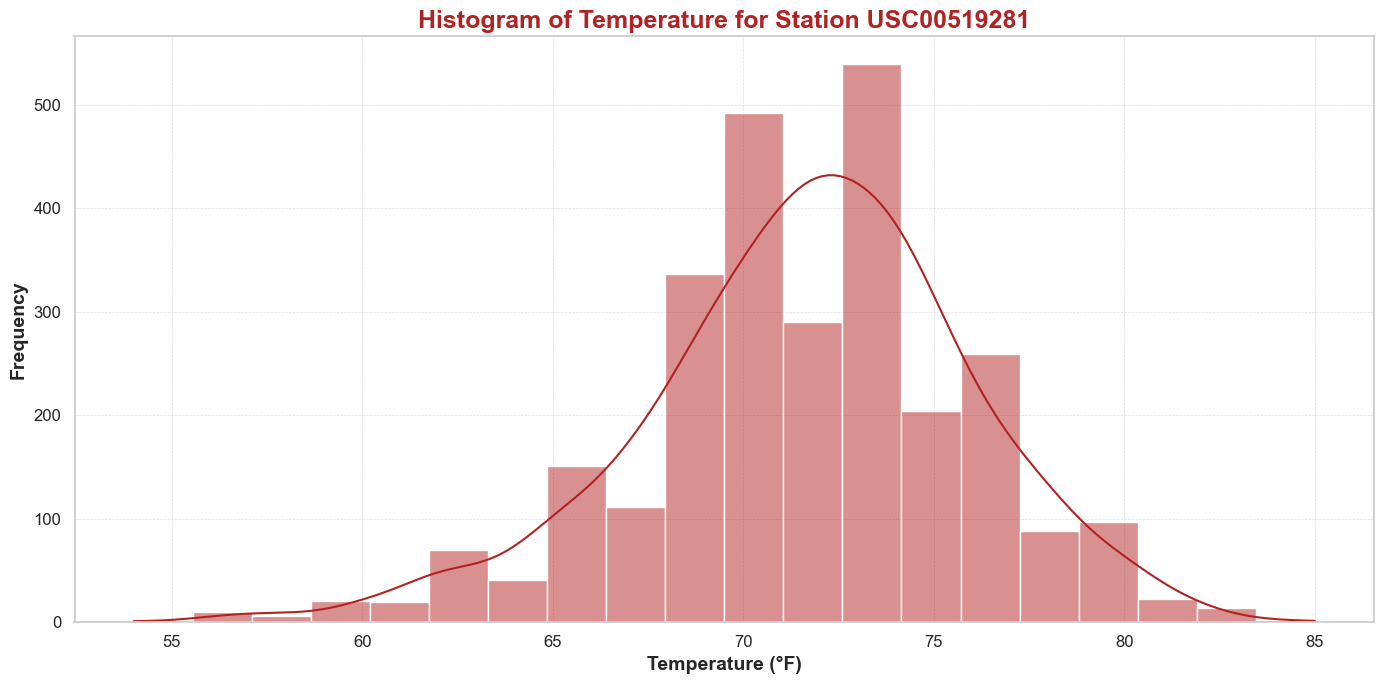

In [29]:
# Define the query to retrieve temperature observations for the most active station
query = """
    SELECT
        tobs
    FROM
        measurement
    WHERE
        station = 'USC00519281';
"""

# Execute the query and load the results into a Pandas DataFrame
df2 = pd.read_sql(text(query), con=engine)

# Set the Seaborn style
sns.set(style="whitegrid")

# Create a figure and an axis
plt.figure(figsize=(14, 7))

# Plot the histogram with enhancements
sns.histplot(df2['tobs'], bins=20, kde=True, color="firebrick")

# Add labels, title, and customize the plot
plt.xlabel("Temperature (°F)", fontsize=14, fontweight='bold')
plt.ylabel("Frequency", fontsize=14, fontweight='bold')
plt.title("Histogram of Temperature for Station USC00519281", fontsize=18, fontweight='bold', color='firebrick')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Use tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()
